In [3]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

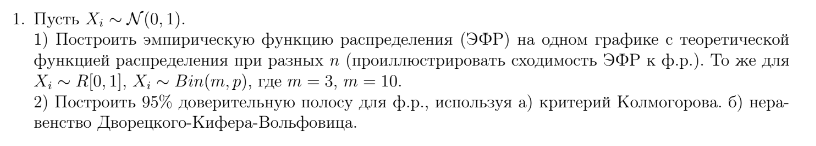

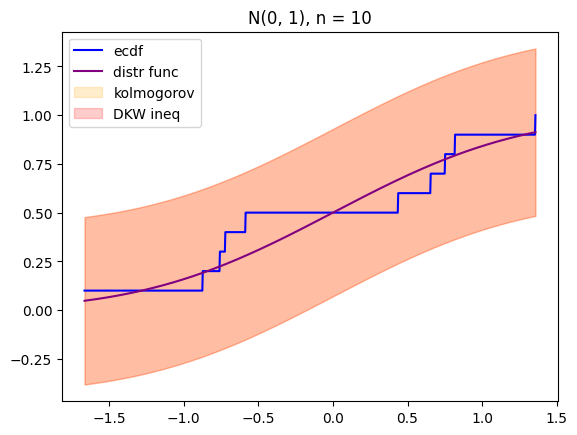

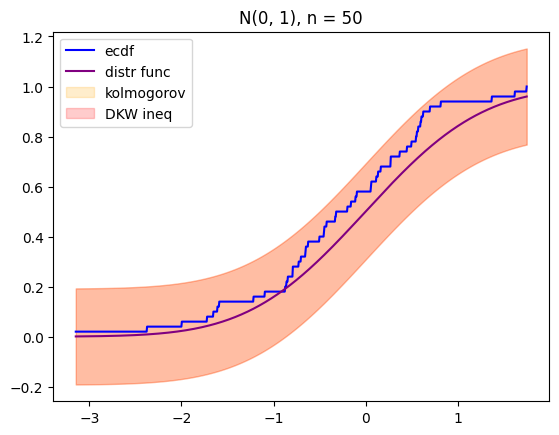

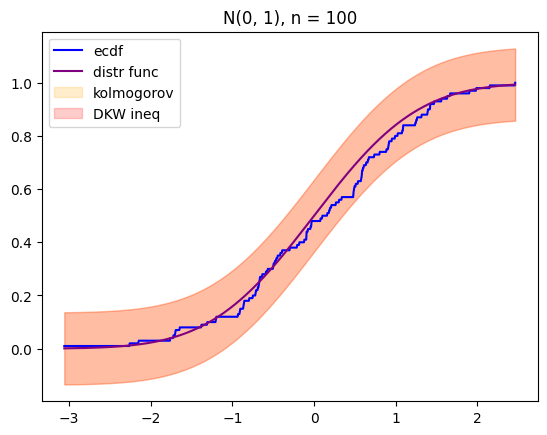

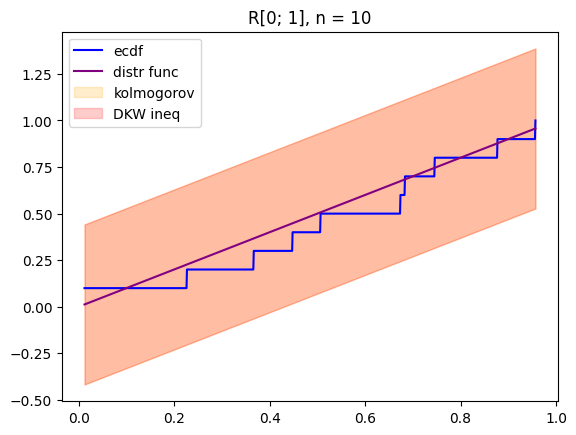

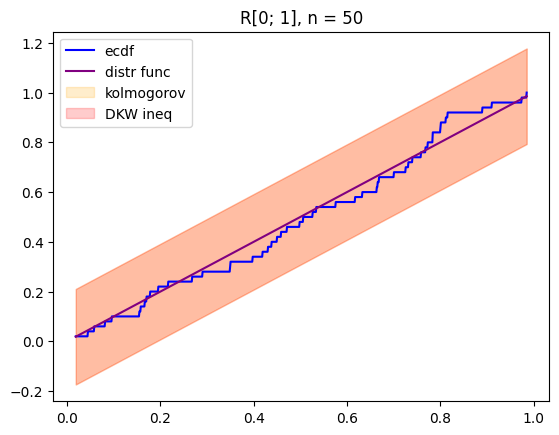

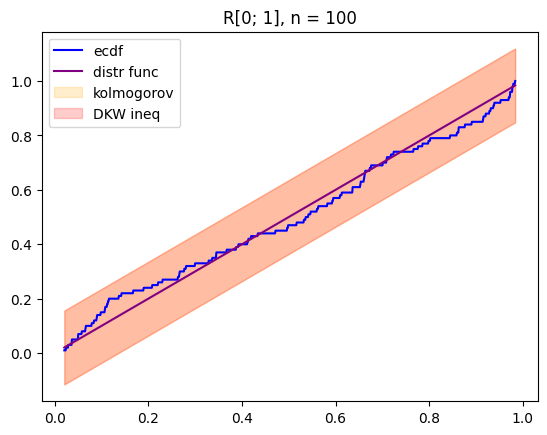

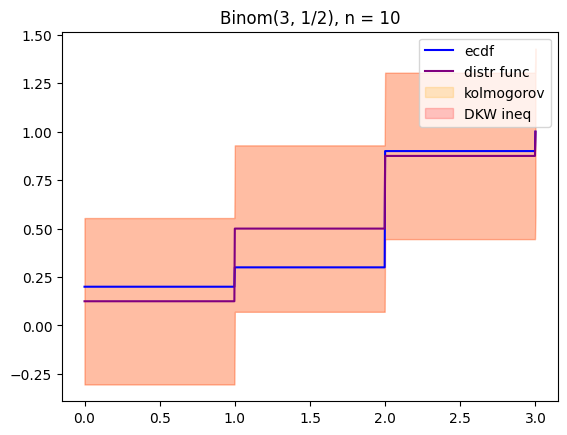

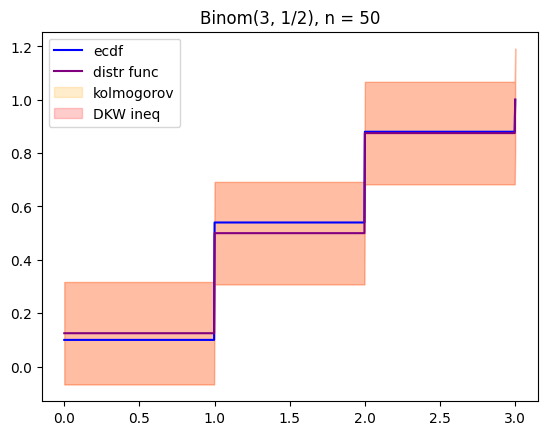

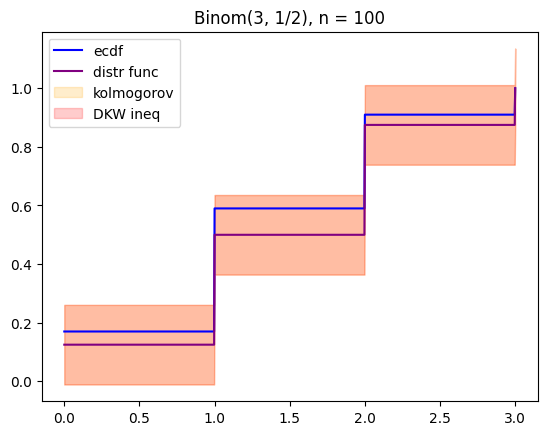

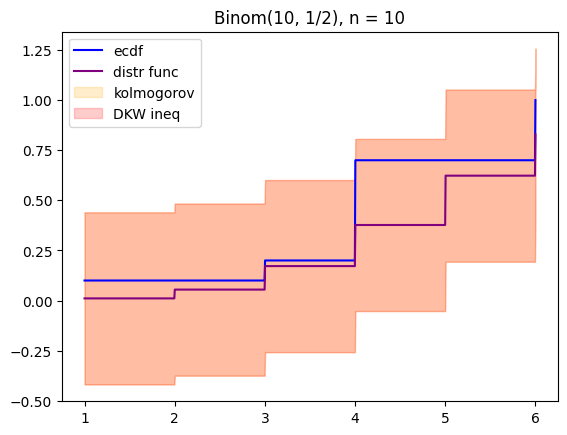

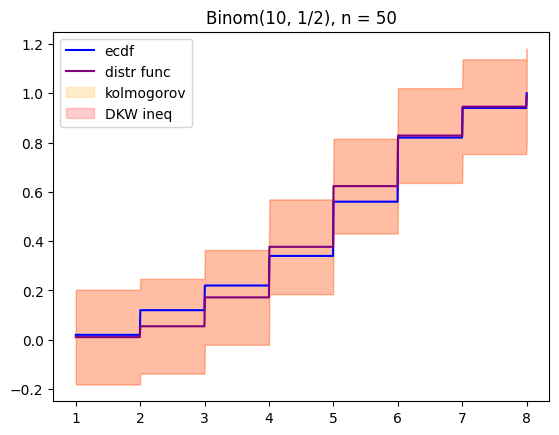

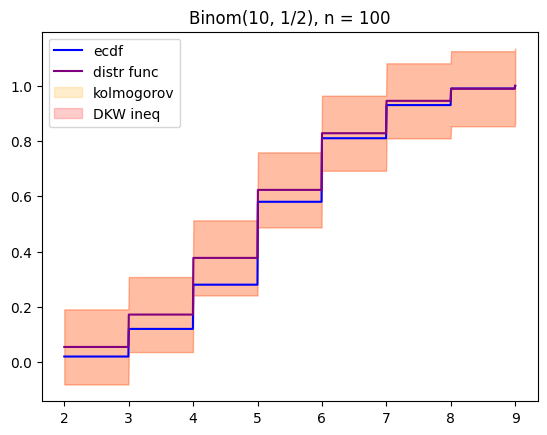

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
N = [10, 50, 100]
def plot(X, dist_name, n):
    plt.figure()
    ecdf = ECDF(X)
    x = np.linspace(min(X), max(X), 1000)
    y = ecdf(x)
    plt.plot(x, y, label='ecdf', color = 'blue')
    if dist_name == 'N(0, 1)':
        cdf = sts.norm.cdf(x, loc = 0, scale = 1)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'R[0; 1]':
        cdf = sts.uniform.cdf(x, loc = 0, scale = 1)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'Binom(3, 1/2)':
        cdf = sts.binom.cdf(x, n = 3, p = 0.5)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'Binom(10, 1/2)':
        cdf = sts.binom.cdf(x, n = 10, p = 0.5)
        res = sts.kstwobign.ppf(0.95)
    plt.plot(x, cdf, label='distr func', color = 'purple')
    plt.fill_between(x, cdf - res/np.sqrt(n), cdf + res/np.sqrt(n), color = 'orange', alpha = 0.2, label = "kolmogorov")
    eps = np.sqrt((1/(2*n)) * np.log(2/0.05))
    plt.fill_between(x, cdf - eps, cdf + eps, color = 'red', alpha = 0.2, label = "DKW ineq")

    plt.title(dist_name + ', n = ' + str(n))
    plt.legend(loc="best")
    plt.show()
for n in N:
    X = sts.norm.rvs(size = n)
    plot(X, 'N(0, 1)', n)

for n in N:
    X = sts.uniform(loc = 0, scale = 1).rvs(size = n)
    plot(X, 'R[0; 1]', n)

for n in N:
    X = sts.binom(n = 3, p = 0.5).rvs(size = n)
    plot(X, 'Binom(3, 1/2)', n)

for n in N:
    X = sts.binom(n = 10, p = 0.5).rvs(size = n)
    plot(X, 'Binom(10, 1/2)', n)

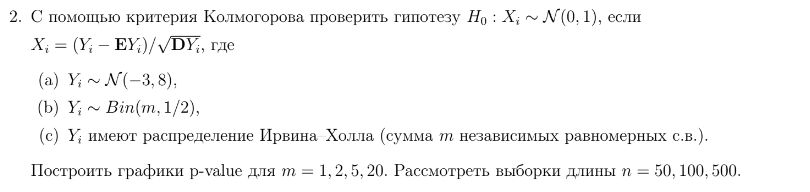

N(-3,8)
Hypothesis acceptance for n = 50: True. Pvalue: 0.7734766118655707
Hypothesis acceptance for n = 100: True. Pvalue: 0.7691484487660992
Hypothesis acceptance for n = 500: True. Pvalue: 0.06834660805661896

Bin(1, 1/2)
Hypothesis acceptance for n = 50: False. Pvalue: 2.3540438992269984e-06
Bin(2, 1/2)
Hypothesis acceptance for n = 50: False. Pvalue: 0.0005850122324396745
Bin(5, 1/2)
Hypothesis acceptance for n = 50: False. Pvalue: 0.0026710443856072796
Bin(20, 1/2)
Hypothesis acceptance for n = 50: True. Pvalue: 0.299127721398345

Bin(1, 1/2)
Hypothesis acceptance for n = 100: False. Pvalue: 1.5262079693608898e-11
Bin(2, 1/2)
Hypothesis acceptance for n = 100: False. Pvalue: 1.8819204313595297e-06
Bin(5, 1/2)
Hypothesis acceptance for n = 100: False. Pvalue: 3.0495941932895833e-05
Bin(20, 1/2)
Hypothesis acceptance for n = 100: False. Pvalue: 0.002630049845461421

Bin(1, 1/2)
Hypothesis acceptance for n = 500: False. Pvalue: 1.0803817062356261e-55
Bin(2, 1/2)
Hypothesis acceptanc

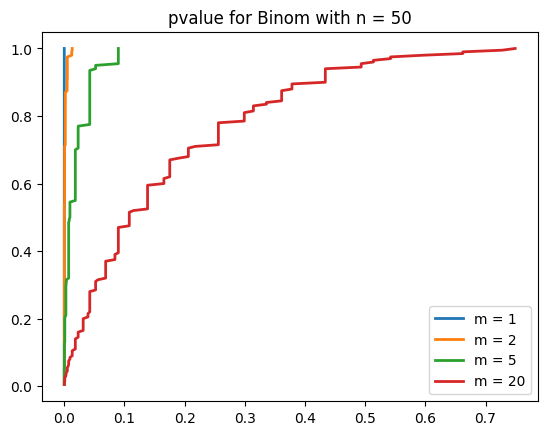

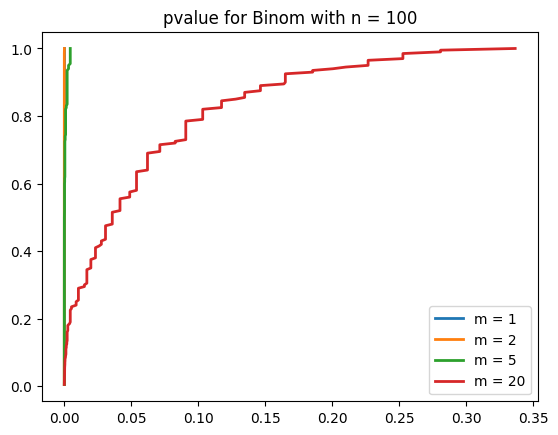

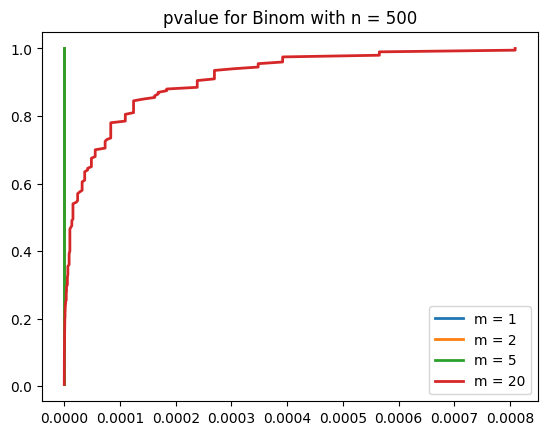

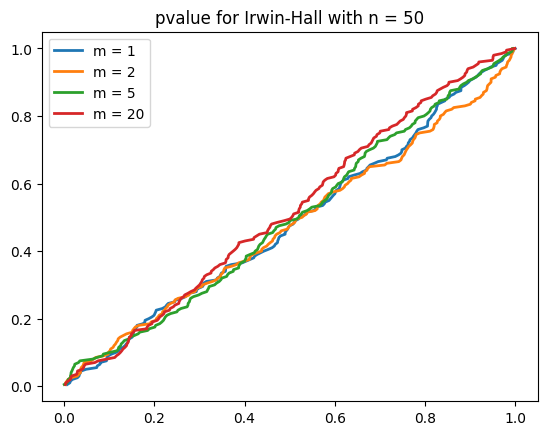

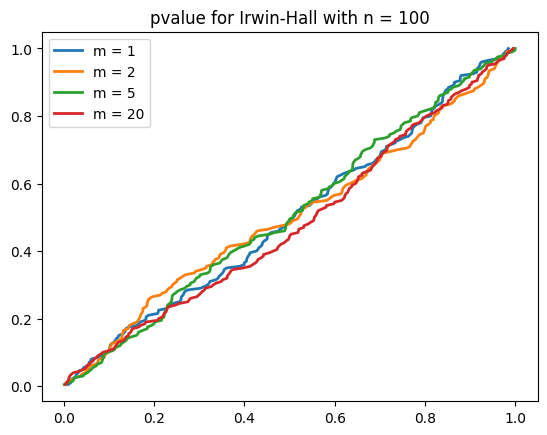

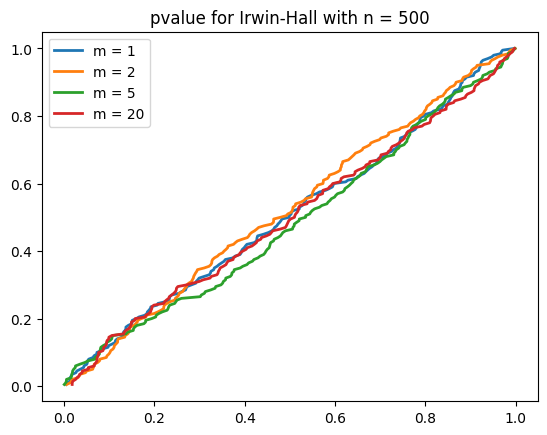

In [7]:
def pval_bin(n:int, k:int):
    m = 200
    result = []
    for j in range (m):
        Y = sts.binom.rvs(n = k, p = 1/2, size=n)
        Sample = (Y - k*1/2)/np.sqrt(k/4)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result, sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"m = {k}")

def pval_ih(n:int, k:int):
    m = 200
    result = []
    for j in range (m):
        Y = np.sum(np.random.uniform(size=(m, n)), axis=0)
        Sample = (Y - m*1/2)/np.sqrt(m/12)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result,sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"m = {k}")

N = [50, 100, 500]
M = [1,2,5,20]
def task_normal(Y, n, mu, sigma):
    pvalue_test = 0.05
    X = (Y - mu)/sigma
    res = sts.kstest(X, 'norm').pvalue
    h_accepted = res > pvalue_test
    print(f"Hypothesis acceptance for n = {n}: {h_accepted}. Pvalue: {res}")

def task_binom(Y, n, k):
    pvalue_test = 0.05
    X = (Y - k*1/2)/np.sqrt(k/4)
    res = sts.kstest(X, 'norm').pvalue
    h_accepted = res > pvalue_test
    print(f"Hypothesis acceptance for n = {n}: {h_accepted}. Pvalue: {res}")

def task_irw(Y, n, m):
    pvalue_test = 0.05
    X = (Y - m*1/2)/np.sqrt(m/12)
    res = sts.kstest(X, 'norm').pvalue
    h_accepted = res > pvalue_test
    print(f"Hypothesis acceptance for n = {n}: {h_accepted}. Pvalue: {res}")

print("N(-3,8)")
for n in N:
    mu = -3
    sigma = np.sqrt(8)
    Y = sts.norm.rvs(loc = mu, scale = sigma, size = n)
    task_normal(Y, n, mu, sigma)
print("")
for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue for Binom with n = {n}")
    for m in M:
        print(f"Bin({m}, 1/2)")
        Y = sts.binom.rvs(n = m, p = 1/2, size = n)
        task_binom(Y, n, m)
        pval_bin(n, m)
    ax.legend()
    print("")

for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue for Irwin-Hall with n = {n}")
    for m in M:
        print(f"Irwin-Hall({m})")
        Y = np.sum(np.random.uniform(size=(m, n)), axis=0)
        task_irw(Y, n, m)
        pval_ih(n,m)
    ax.legend()
    print("")

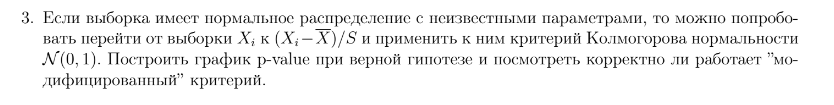

Hypothesis test: True

Hypothesis test: True

Hypothesis test: True



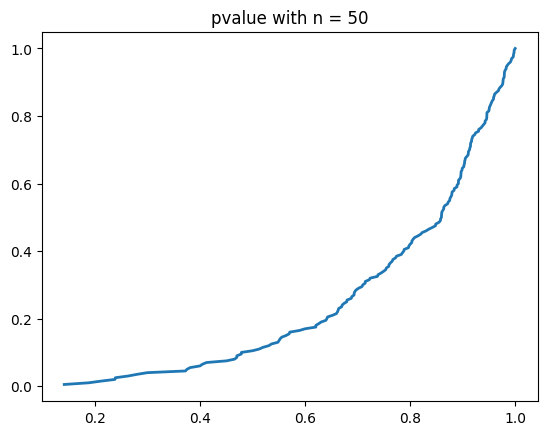

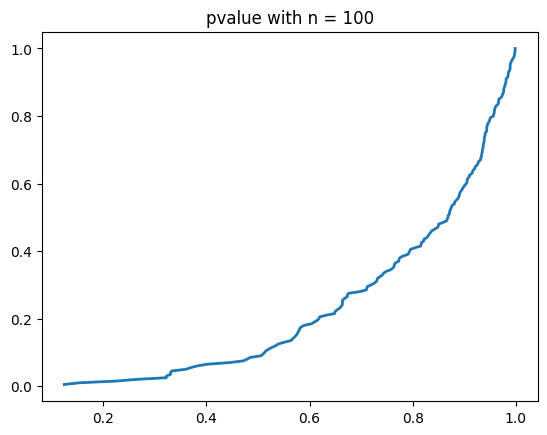

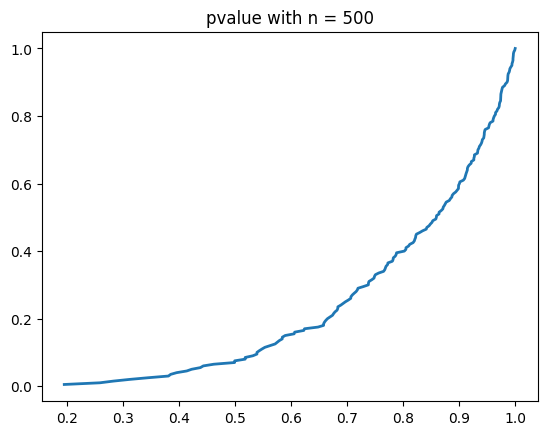

In [2]:
N = [50, 100, 500]
def pval(n:int):
    m = 200
    result = []
    for j in range (m):
        Y = sts.norm.rvs(loc = 10, scale = 20, size = n)
        Sample = (Y - np.mean(Y))/np.std(Y)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result,sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2)

for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue with n = {n}")
    Y = sts.norm.rvs(loc = 10, scale = 20, size = n)
    Sample = (Y - np.mean(Y))/np.std(Y)
    sample_val = sts.kstest(Sample, 'norm')
    print(f"Hypothesis test: {sample_val.pvalue > 0.05}")
    pval(n)
    print("")